In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

pd.set_option('max_columns', None)

## Load Data Set

In [2]:
df = pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


# EDA

## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

1. Type seluruh data sudah sesuai dengan apa yang seharusnya. 
2. Terdapat missing value pada column Arrival Delay in Minutes

In [4]:
def draw_missing_data_table (data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    return missing_data

In [5]:
draw_missing_data_table(df)

,Total,Percent
Arrival Delay in Minutes,393,0.302587
Gate location,0,0.000000
Gender,0,0.000000
Customer Type,0,0.000000
Age,0,0.000000
Type of Travel,0,0.000000
Class,0,0.000000
Flight Distance,0,0.000000
Seat comfort,0,0.000000
Departure/Arrival time convenient,0,0.000000


Terdapat 393 data pada column Arrival Delay in Minutes, dan proporsinya adalah 0.3%. Bisa dihandle dengan lakukan insert ataupun delete.

In [6]:
numerical = df.dtypes[df.dtypes != 'object'].index
categorical = df.dtypes[df.dtypes == 'object'].index

In [7]:
numerical

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [8]:
categorical

Index(['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [15]:
df.sample(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
24154,satisfied,Female,Loyal Customer,35,Personal Travel,Eco,1444,3,3,3,3,5,5,5,5,5,4,5,3,4,5,8,2.0
110297,satisfied,Male,Loyal Customer,48,Business travel,Business,2622,1,1,1,1,5,5,5,5,5,4,5,3,5,3,0,0.0
39034,satisfied,Female,Loyal Customer,25,Personal Travel,Business,2726,5,4,5,2,4,5,4,4,4,3,4,3,5,4,0,0.0
126014,satisfied,Male,Loyal Customer,48,Business travel,Business,2757,5,5,5,5,2,4,5,5,5,5,5,5,5,3,8,43.0
111090,satisfied,Female,Loyal Customer,55,Business travel,Business,412,2,3,2,2,1,2,1,5,5,4,5,1,5,1,11,0.0


In [16]:
# Statistics Description
df[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [17]:
# Statistics Description
df[categorical].describe().transpose()

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [18]:
#Check unique value
cols = df.columns
cols = list(cols)
cols.remove('Departure Delay in Minutes')
cols.remove('Arrival Delay in Minutes')

In [19]:
for col in cols:
    print (col)
    print (df[col].unique())
    print ("==" * 20)

satisfaction
['satisfied' 'dissatisfied']
Gender
['Female' 'Male']
Customer Type
['Loyal Customer' 'disloyal Customer']
Age
[65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco' 'Business' 'Eco Plus']
Flight Distance
[ 265 2464 2138 ... 5832 5120 4260]
Seat comfort
[0 1 4 5 2 3]
Departure/Arrival time convenient
[0 1 2 3 4 5]
Food and drink
[0 1 2 3 4 5]
Gate location
[2 3 4 1 5 0]
Inflight wifi service
[2 0 3 4 5 1]
Inflight entertainment
[4 2 0 3 5 1]
Online support
[2 3 4 5 1 0]
Ease of Online booking
[3 2 1 5 4 0]
On-board service
[3 4 1 2 5 0]
Leg room service
[0 4 3 2 5 1]
Baggage handling
[3 4 1 2 5]
Checkin service
[5 2 4 3 1 0]
Cleanliness
[3 4 1 2 5 0]
Online boarding
[2 3 5 4 1 0]


In [20]:
#Check duplicate data
df.duplicated().sum()

0

1. Tidak ada nilai yang invalid atau anomaly, nilai max dan min sudah sesuai, dan jumlah unique value pada feature categorical sudah sesuai.
2. Distribusi feature numeric secara umum berdistribusi normal
3. Distribusi feature numeric Departure dan Arrival Delay in Minutes berdisitribusi skew positif. Sepertinya akan banyak outlier pada dua feature tersebut.
4. Tidak ada duplicate data

## Univariate Analysis

### Distribution of Target 

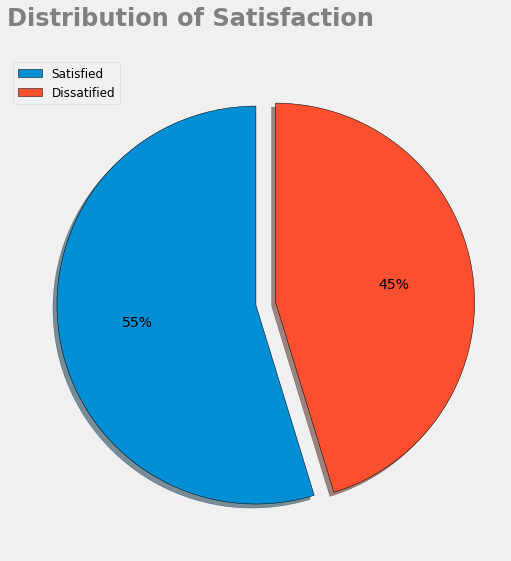

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 8))
data = df['satisfaction'].value_counts()
plt.title('Distribution of Satisfaction', fontsize = 24, color = 'grey', loc = 'left', y = 1.05, weight = 'bold' )
plt.pie(data, startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=(0, 0.1), shadow=True)
plt.legend(loc='best', labels=['Satisfied', 'Dissatified'], fontsize=12)
plt.tight_layout()
plt.show()

Terlihat cukup balance untuk target dengan perbandingan proporsi sebesar 55:45

### Distribution of  Feature Categorical

In [22]:
feature_categori = list(categorical)
feature_categori.remove('satisfaction')

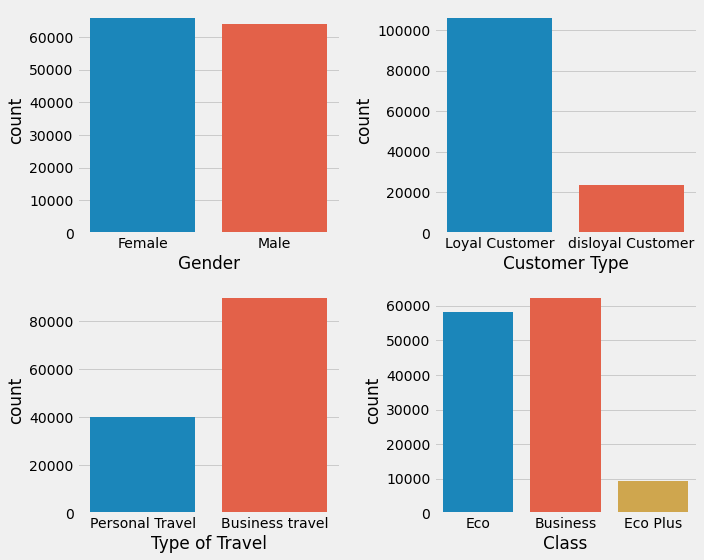

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 8))
for index in range(0, len(feature_categori)):
    plt.subplot(2, 2, index+1)
    sns.countplot(df[feature_categori[index]])
    plt.tight_layout()

Terlihat distribusi dari masing-masing feature categorical.
1. Distribusi pada Gender cukup seimbang
2. Distribusi Customer Type di dominasi oleh Loyal Customer
3. Distribusi pada Type of Travel di dominasi oleh Business Travel
4. Distribusi pada Class di donminasi oleh Business

Berdasarkan plot di atas dapat disimpulkan bahwa penumpang invistico airlines bisa dikategorikan dengan ekonomi kelas atas, karena didominasi oleh customer type yang loyal, menggunakan jenis travel bisnis, dan classnya juga bisnis

### Distribution of Feature Numerical

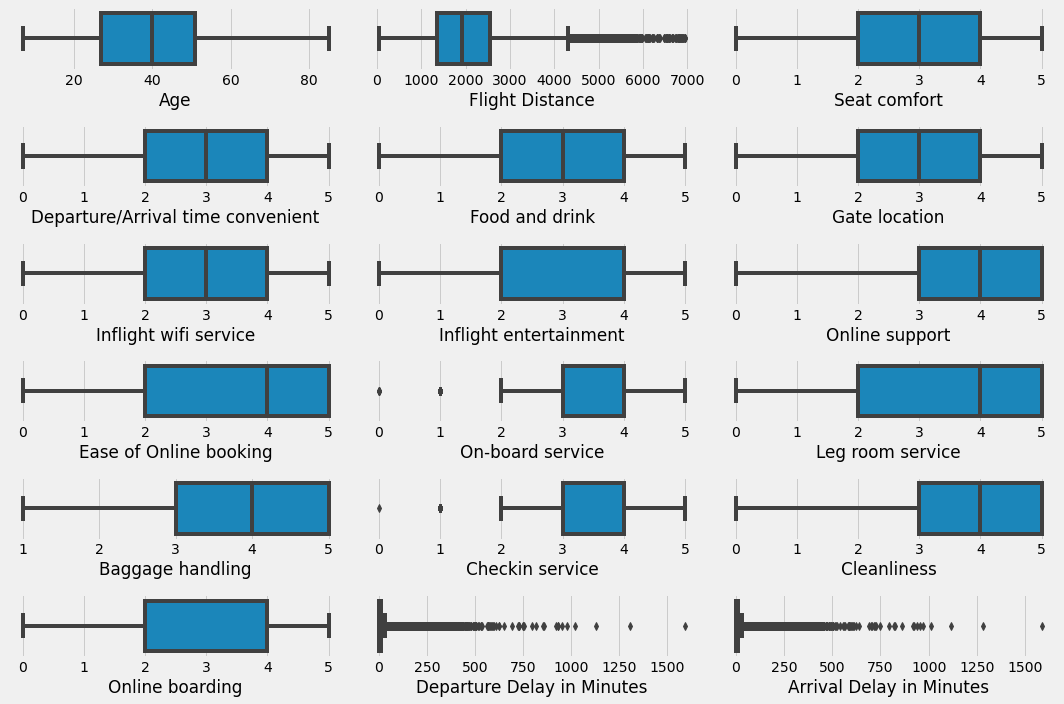

In [24]:
#Visualization distribution of feature numerical
plt.figure(figsize = (15, 10))
for i in range(0, len(numerical)):
    plt.subplot(6, 3, i+1)
    sns.boxplot(df[numerical[i]], orient = 'h')
    plt.tight_layout()

Kita lihat bahwa secara umum distribusi pada feature numerik adalah berdistribusi normal. Hanya ada beberapa feature yang berdistribusi skew:
1. Inflight Entertainment, Leg room, Online boarding, dan Ease of Online booking  berdistribusi skew negatif
2. Checkin Service, On-Boad service berdistribusi skew positif
3. Terdapat outlier di feature on-board service, checkin service, flight distance, depature, dan arrival delay in minutes 

Setelah melakukan beberapa data explorasi, sekarang akan dilakukan pencarian insight bisnis yang ada di dataset.

In [25]:
def age_category (x):
    if x < 27:
        return 'Anak Muda'
    elif x >= 27 and x <= 51.0:
        return 'Dewasa'
    else:
        return 'Lansia'
    
df['age_category'] = df['Age'].apply(lambda x: age_category(x))

df['age_category'].value_counts()/df.shape[0]

Dewasa       0.522744
Anak Muda    0.238643
Lansia       0.238613
Name: age_category, dtype: float64

## Bivariate Analysis

### Distribution of Feature Categorical  for Target

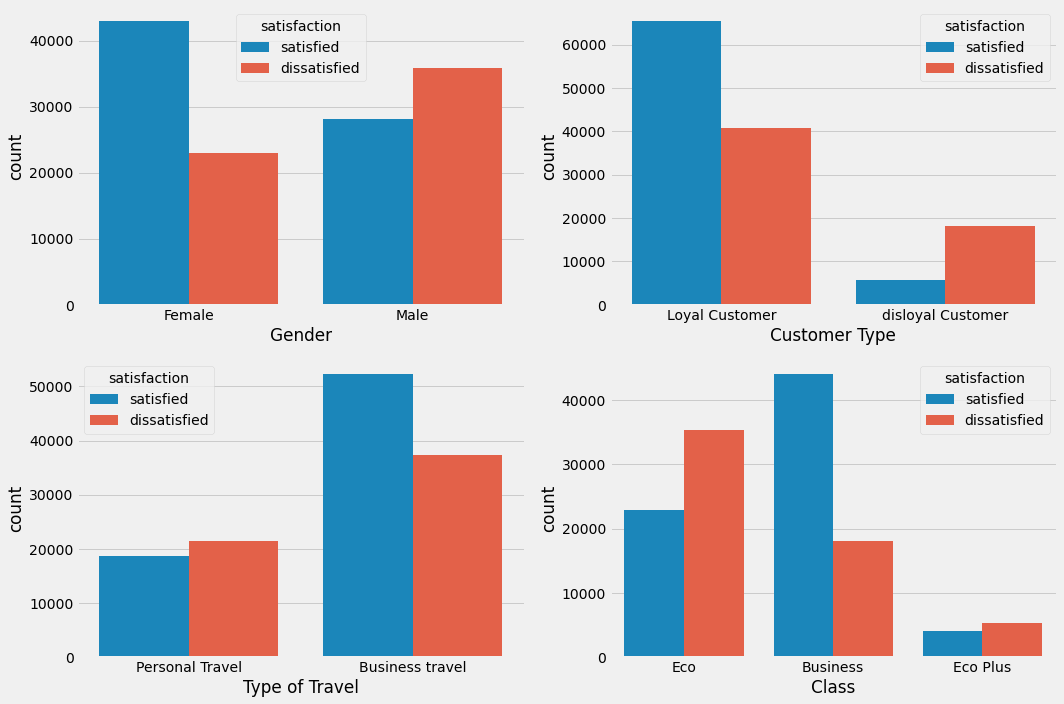

In [26]:
plt.figure(figsize = (15, 10))
for index in range(0, len(feature_categori)):
    plt.subplot(2, 2, index+1)
    sns.countplot(df[feature_categori[index]], hue = df['satisfaction'])
    plt.tight_layout()

1. Terlihat bahwa gender female lebih dominan puas terhadap layanan invistico airlines, sedangkan gender male dominan tidak puas terhadap layanan invistico airlines.
2. Terlihat bahwa Customer Type loyal customer lebih dominan puas terhadap layanan invistico airlines, sedangkan Customer Type disloyal customer dominan tidak puas terhadap layanan invistico airlines.
3. Terlihat bahwa perbandingan kepuasan terhadap layanan invistico airlines pada pesonal travel cukup seimbang, sedangkan pada business travel lebih dominan puas terhadap layanan invistico airlines.
4. Terlihat pada class dengan kategori eco dan eco plus didominasi dengan tidak puas terhadap layanan invistico airlines, sedangkan pada kelas bisnis didominasi oleh puas terhadap layanan invistico airlines.

### Distribution of Feature Numerical  for Target

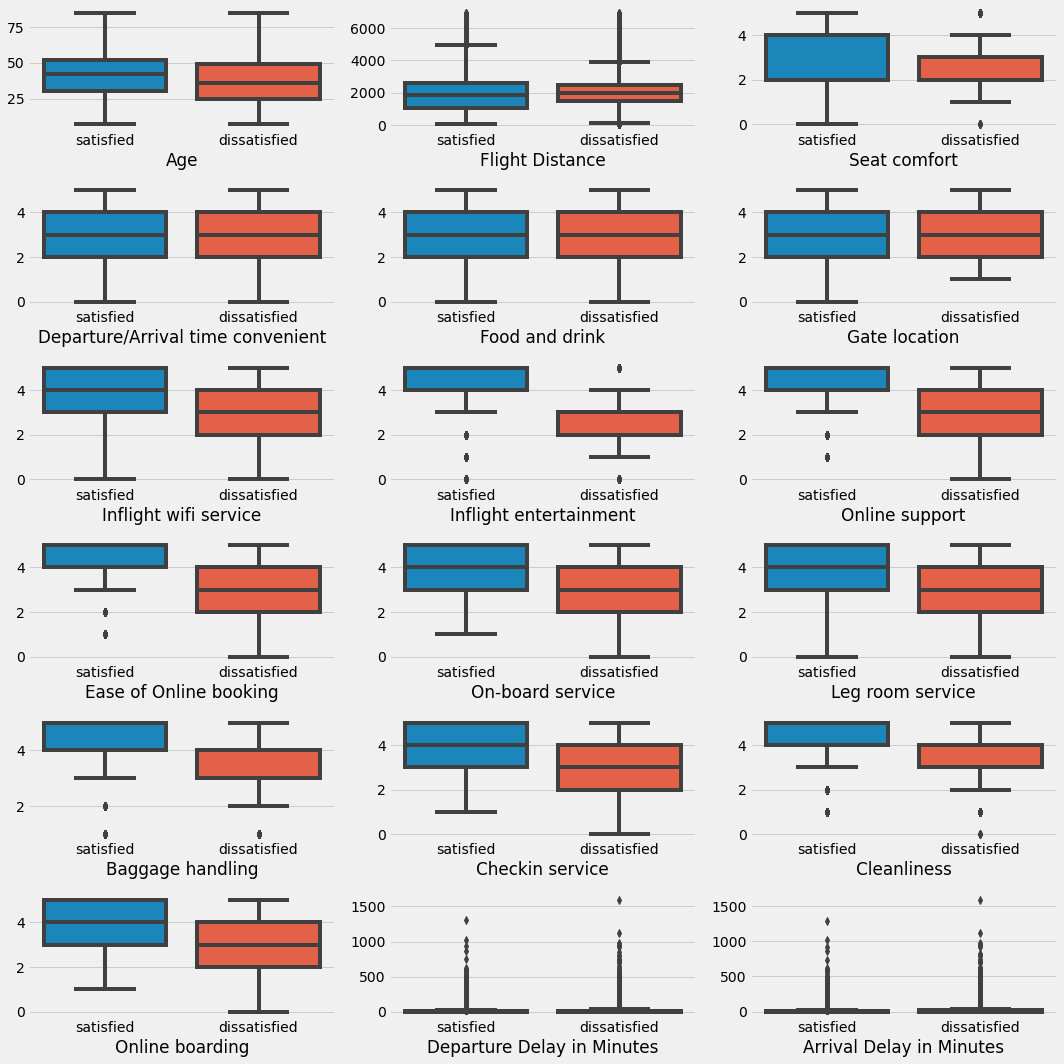

In [27]:
plt.figure(figsize = (15, 15))
for i in range(0, len(numerical)):
    plt.subplot(6, 3, i+1)
    sns.boxplot(x= 'satisfaction', y = numerical[i], data = df, orient = 'v')
    plt.xlabel(numerical[i])
    plt.ylabel(None)
    plt.tight_layout()

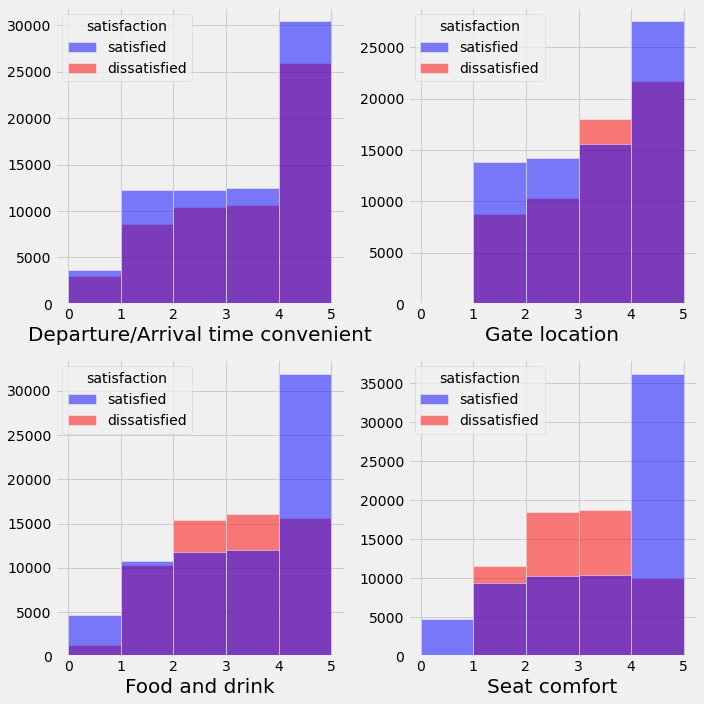

In [28]:
services = ['Departure/Arrival time convenient', 'Gate location', 'Food and drink', 'Seat comfort']

plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 10))
for i in range(0, len(services)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x = services[i], data = df, binwidth = 1, hue = 'satisfaction', palette=['blue', 'red'])
    plt.xlabel(services[i], fontsize = 20)
    plt.ylabel(None)
    plt.tight_layout()

Berdasarkan plot di atas terlihat bahwa feature-feature service untuk kategori satisfied memiliki rating sekitar 4-5, sedangkan yang dissatified memiliki rating dari 0 sampai 3. Namun terdapat anomaly pada feature Seat Comfort, Gate location, Food and Drink dan Departure/Arrival Delay Minutes.

### Satisfaction Rate of Feature Categorical

In [29]:
#create id for dataset
df['Id'] = df.index

In [30]:
#Create function for create data frame target
def create_df_target_rate(df, feature, target):
    satisfaction_feature = df.groupby([feature, target])['Id'].nunique().reset_index()
    satisfaction_feature.columns = [feature, target, 'Amount']
    satisfaction_feature['Total'] = satisfaction_feature.groupby([feature])['Amount'].transform('sum')
    satisfaction_feature['Satisfaction Rate'] = satisfaction_feature['Amount']/satisfaction_feature['Total'] * 100
    satisfaction_feature = pd.pivot_table(satisfaction_feature, index = [feature], columns = [target], values = ['Satisfaction Rate']).reset_index()
    
    return satisfaction_feature

In [31]:
satisfaction_class = create_df_target_rate(df, 'Class', 'satisfaction')
satisfaction_class

Class Satisfaction Rate           
satisfaction                dissatisfied  satisfied
0             Business         29.062098  70.937902
1                  Eco         60.601279  39.398721
2             Eco Plus         57.294655  42.705345

<Figure size 1440x1440 with 0 Axes>

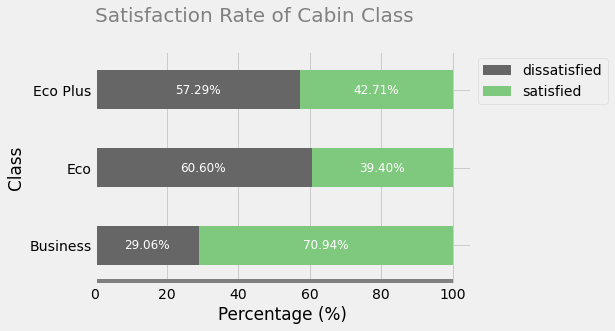

In [32]:
#visualisasi
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20, 20))
satisfaction_class.plot(x = 'Class', y = 'Satisfaction Rate', kind='barh', stacked = True, width = 0.5, colormap = 'Accent_r')
plt.title('Satisfaction Rate of Cabin Class', y = 1.1, fontsize = 20, color = 'gray', loc = 'left')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Percentage (%)')
plt.ylabel('Class')
plt.hlines(y = -0.5, xmin = 0, xmax = 100, linewidth = 10, colors = 'grey')
for y_index in range(0, 3):
        plt.text(x = satisfaction_class['Satisfaction Rate']['dissatisfied'].iloc[y_index] / 2, y = y_index, s = "{:.2f}%".format(satisfaction_class['Satisfaction Rate']['dissatisfied'].iloc[y_index]), ha = 'center', va = 'center', color = 'white', fontsize = 12)
        plt.text(x = (satisfaction_class['Satisfaction Rate']['dissatisfied'].iloc[y_index] + 100) / 2, y = y_index, s = "{:.2f}%".format(satisfaction_class['Satisfaction Rate']['satisfied'].iloc[y_index]), ha = 'center', va = 'center', color = 'white',fontsize = 12)
plt.show()

Berdasarkan plot di atas dapat disimpulkan bahwa terlihat pada cabin class eco dan eco plus memiliki dissatisfied yang tinggi dibandingkan dengan bisnis cabin class. Langkah selanjutkan kita mencari tahu rata-rata service rating.  

### Average of Feature Service Rating

In [33]:
feature_rating = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment',
'Online support', 'Ease of Online booking', 'On-board service','Leg room service','Baggage handling','Checkin service', 'Cleanliness','Online boarding']

df_rating = df[feature_rating]
df_rating_mean = df_rating.mean().reset_index()
df_rating_mean.columns = ['Feature', 'Mean']
df_rating_mean.sort_values('Mean', ascending = True, inplace = True)

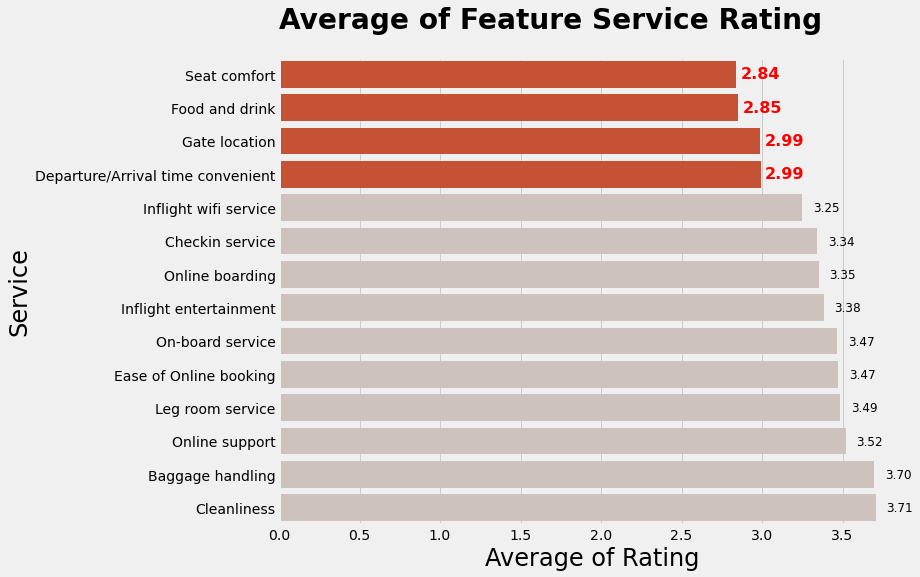

In [34]:
#visualisasi
palette = ['#de441d','#de441d','#de441d','#de441d', '#d1c1bc','#d1c1bc','#d1c1bc','#d1c1bc','#d1c1bc','#d1c1bc','#d1c1bc','#d1c1bc','#d1c1bc','#d1c1bc']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
sns.barplot(x = 'Mean', y = 'Feature' , data = df_rating_mean, palette = palette)
plt.title("Average of Feature Service Rating", fontsize = 28, color = 'Black', loc = 'left', y = 1.05, weight = 'bold')
plt.xlabel('Average of Rating', loc = 'center', fontsize = 24, color= 'black')
plt.ylabel('Service', loc = 'center', fontsize = 24, color= 'black')
#plt.text(x = 4.3, y = 3.5, fontsize = 20, s = 'Terlihat bahwa terdapat 4 service yang memiliki rata-rata rating\nlebih kecil sama dengan 3, yaitu:\n1. Departure/Arrival time convenient\n2. Gate Location\n3. Food and drink\n4. Seat Comfort')

for index in range(0, len(df_rating_mean)):
     if index < 4:
        plt.text(x = df_rating_mean['Mean'].iloc[index] + 0.15 , y = index + 0.12, s = '{0:.2f}'.format(df_rating_mean['Mean'].iloc[index]), fontsize = 16, ha = 'center', rotation = 'horizontal', weight = 'bold', color = 'red')
     else:
        plt.text(x = df_rating_mean['Mean'].iloc[index] + 0.15 , y = index + 0.12, s = '{0:.2f}'.format(df_rating_mean['Mean'].iloc[index]), fontsize = 12, ha = 'center', rotation = 'horizontal')

plt.show()

Berdasarkan barplot diatas terlihat bahwa service yang memiliki rating dibawah 3 yaitu:
1. Departure/Arrival time convenient
2. Gate location
3. Food and drink
4. Seat comfort

Langkah selanjutnya kita selidiki rata-rata rating service disetiap cabin class

### Average Rating in Cabin Class

In [35]:
df_eco = df[df['Class']=='Eco']
df_eco_plus = df[df['Class']=='Eco Plus']
df_business = df[df['Class']=='Business']

In [36]:
df_eco_mean_rating = df_eco[feature_rating].mean().reset_index()
df_eco_mean_rating.columns = ['Service', 'Mean Rating']
df_eco_mean_rating.sort_values(['Mean Rating'], ascending = False, inplace = True)

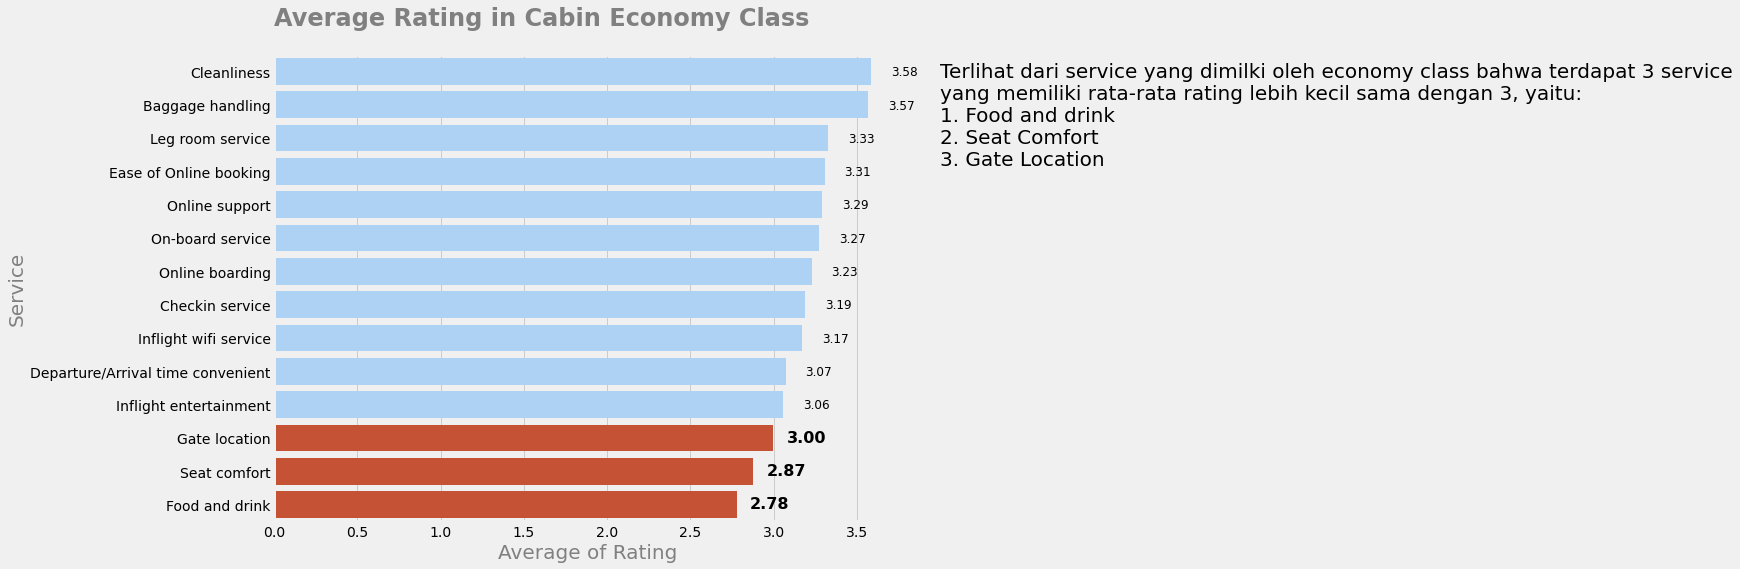

In [37]:
palette = ['#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#de441d','#de441d','#de441d']
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
sns.barplot(x = 'Mean Rating', y = 'Service' , data = df_eco_mean_rating, palette = palette)

plt.title("Average Rating in Cabin Economy Class", fontsize = 24, color = 'grey', loc = 'left', y = 1.05, weight = 'bold')
plt.xlabel('Average of Rating', loc = 'center', fontsize = 20, color= 'grey')
plt.ylabel('Service', loc = 'center', fontsize = 20, color= 'grey')
plt.text(x = 4, y = 2.8, fontsize = 20, s = 'Terlihat dari service yang dimilki oleh economy class bahwa terdapat 3 service\nyang memiliki rata-rata rating lebih kecil sama dengan 3, yaitu:\n1. Food and drink\n2. Seat Comfort\n3. Gate Location')

for index in range(0, len(df_eco_mean_rating)):
    if index <11:
        plt.text(x = df_eco_mean_rating['Mean Rating'].iloc[index] + 0.2 , y = index + 0.12, s = '{0:.2f}'.format(df_eco_mean_rating['Mean Rating'].iloc[index]), fontsize = 12, ha = 'center', rotation = 'horizontal')
    else:
        plt.text(x = df_eco_mean_rating['Mean Rating'].iloc[index] + 0.2 , y = index + 0.12, s = '{0:.2f}'.format(df_eco_mean_rating['Mean Rating'].iloc[index]), fontsize = 16, ha = 'center', rotation = 'horizontal', weight = 'bold')

plt.show()

In [38]:
df_eco_plus_mean_rating = df_eco_plus[feature_rating].mean().reset_index()
df_eco_plus_mean_rating.columns = ['Service', 'Mean Rating']
df_eco_plus_mean_rating.sort_values(['Mean Rating'], ascending = False, inplace = True)

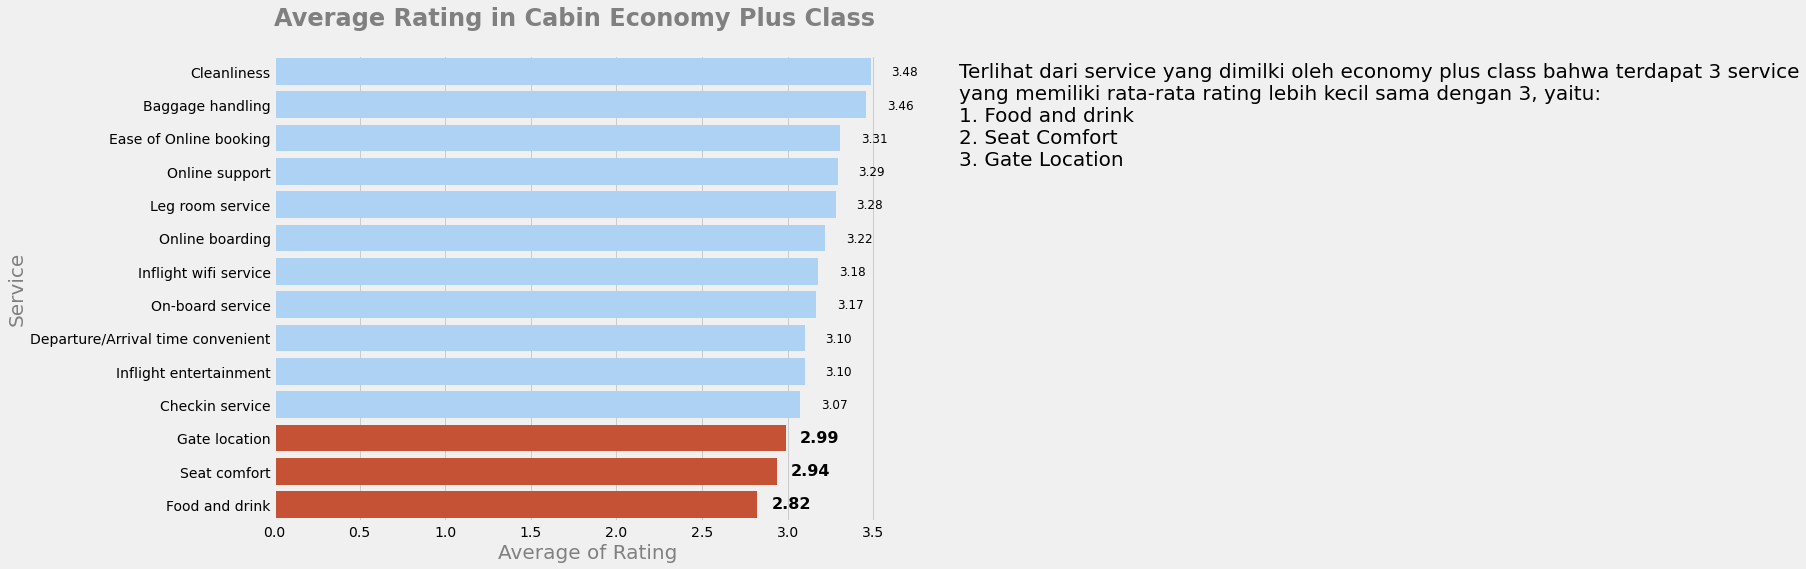

In [39]:
palette = ['#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#de441d','#de441d','#de441d']
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.barplot(x = 'Mean Rating', y = 'Service' , data = df_eco_plus_mean_rating, palette = palette)
plt.title("Average Rating in Cabin Economy Plus Class", fontsize = 24, color = 'grey', loc = 'left', y = 1.05, weight = 'bold')
plt.xlabel('Average of Rating', loc = 'center', fontsize = 20, color= 'grey')
plt.ylabel('Service', loc = 'center', fontsize = 20, color= 'grey')
plt.text(x = 4, y = 2.8, fontsize = 20, s = 'Terlihat dari service yang dimilki oleh economy plus class bahwa terdapat 3 service\nyang memiliki rata-rata rating lebih kecil sama dengan 3, yaitu:\n1. Food and drink\n2. Seat Comfort\n3. Gate Location')

for index in range(0, len(df_eco_plus_mean_rating)):
    if index <11:
        plt.text(x = df_eco_plus_mean_rating['Mean Rating'].iloc[index] + 0.2 , y = index + 0.12, s = '{0:.2f}'.format(df_eco_plus_mean_rating['Mean Rating'].iloc[index]), fontsize = 12, ha = 'center', rotation = 'horizontal')
    else:
        plt.text(x = df_eco_plus_mean_rating['Mean Rating'].iloc[index] + 0.2 , y = index + 0.12, s = '{0:.2f}'.format(df_eco_plus_mean_rating['Mean Rating'].iloc[index]), fontsize = 16, ha = 'center', rotation = 'horizontal', weight = 'bold')
plt.show()

In [41]:
df_business_mean_rating = df_business[feature_rating].mean().reset_index()
df_business_mean_rating.columns = ['Service', 'Mean Rating']
df_business_mean_rating.sort_values(['Mean Rating'], ascending = False, inplace = True)

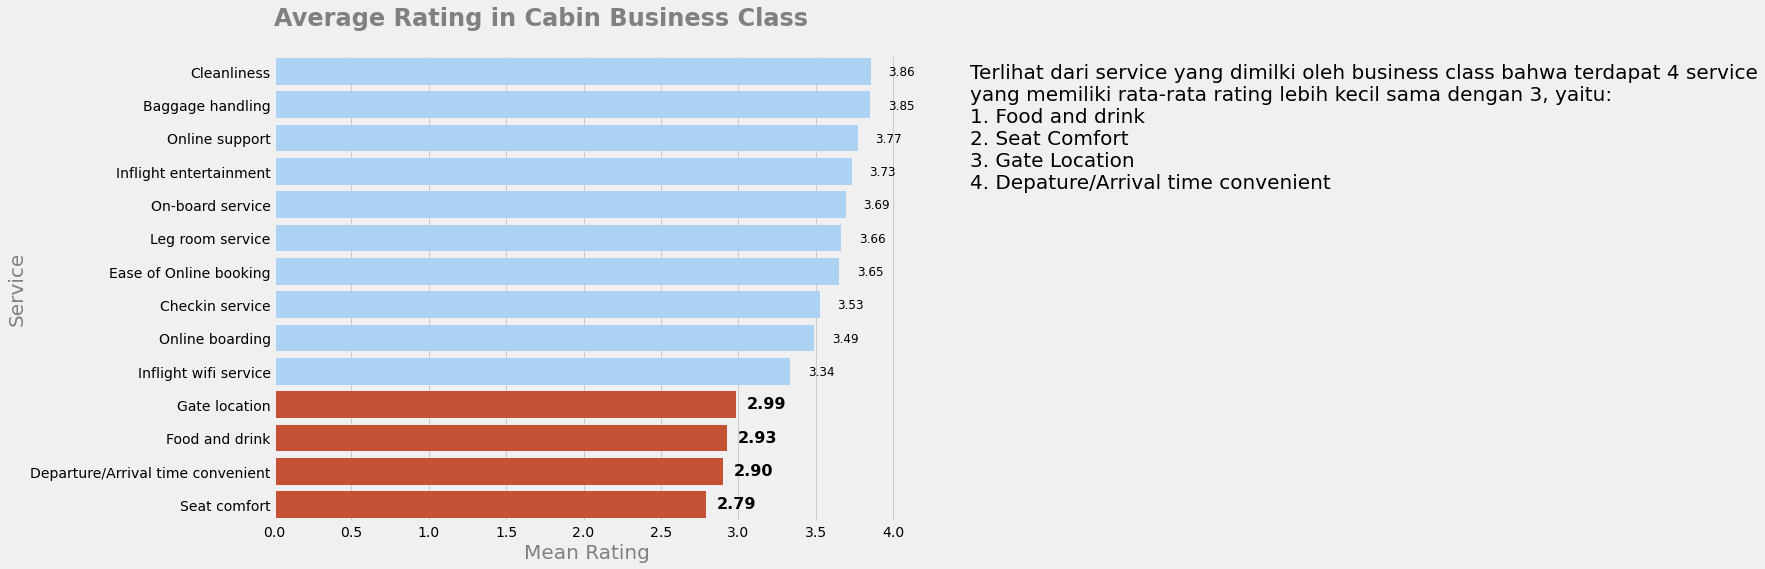

In [42]:
palette = ['#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#a2d2ff','#de441d','#de441d','#de441d','#de441d']
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.barplot(x = 'Mean Rating', y = 'Service' , data = df_business_mean_rating, palette = palette)
plt.title("Average Rating in Cabin Business Class", fontsize = 24, color = 'grey', loc = 'left', y = 1.05, weight = 'bold')
plt.xlabel('Mean Rating', loc = 'center', fontsize = 20, color= 'grey')
plt.ylabel('Service', loc = 'center', fontsize = 20, color= 'grey')
plt.text(x = 4.5, y = 3.5, fontsize = 20, s = 'Terlihat dari service yang dimilki oleh business class bahwa terdapat 4 service\nyang memiliki rata-rata rating lebih kecil sama dengan 3, yaitu:\n1. Food and drink\n2. Seat Comfort\n3. Gate Location\n4. Depature/Arrival time convenient')

for index in range(0, len(df_business_mean_rating)):
    if index <10:
        plt.text(x = df_business_mean_rating['Mean Rating'].iloc[index] + 0.2 , y = index + 0.12, s = '{0:.2f}'.format(df_business_mean_rating['Mean Rating'].iloc[index]), fontsize = 12, ha = 'center', rotation = 'horizontal')
    else:
        plt.text(x = df_business_mean_rating['Mean Rating'].iloc[index] + 0.2 , y = index + 0.12, s = '{0:.2f}'.format(df_business_mean_rating['Mean Rating'].iloc[index]), fontsize = 16, ha = 'center', rotation = 'horizontal', weight = 'bold')

plt.show()

#### Summary EDA
Berdasarkan analisa diatas, kita ketahui bahwa service-service dibawah ini merupakan service yang memiliki rating dibawah 3 diseluruh cabin class: 
1. Food and Drink 
2. Seat Comfort
3. Gate Location
4. Departure/Arrival Time Convenient

Oleh karena itu, perlu adanya perbaikan diservice tersebut agar tingkat satisfied meningkat.

# Data Pre-processing

## Data Cleansing

In [43]:
df1 = df.copy()

In [44]:
df1['Arrival Delay in Minutes'].fillna(df1['Arrival Delay in Minutes'].median(), inplace=True)

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

## Feature Engineering

In [46]:
le = LabelEncoder()
df1["Satisfaction Label"] = le.fit_transform(df1['satisfaction'])

df1['Class Label'] = np.where(df['Class'] == 'Eco', 0, np.where(df['Class'] == 'Eco Plus', 1, 2))

In [47]:
#One hot Encoding pada feature gender, customer type, dan type of travel
df2 = pd.get_dummies(df1[['Gender', 'Customer Type', 'Type of Travel']])

df1=pd.concat([df1,df2],axis=1)

df1.sample(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,age_category,Id,Satisfaction Label,Class Label,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
128956,satisfied,Male,Loyal Customer,42,Business travel,Business,3575,1,1,1,1,5,5,5,3,2,5,4,5,4,5,153,149.0,Dewasa,128956,1,2,0,1,1,0,1,0
4002,dissatisfied,Male,Loyal Customer,12,Personal Travel,Eco,1597,1,4,1,2,3,1,3,3,5,2,1,5,1,3,0,0.0,Anak Muda,4002,0,0,0,1,1,0,0,1
13440,dissatisfied,Male,Loyal Customer,69,Personal Travel,Eco,1630,2,4,2,2,1,2,1,1,4,3,4,3,5,1,0,0.0,Lansia,13440,0,0,0,1,1,0,0,1
23312,satisfied,Female,Loyal Customer,7,Personal Travel,Eco Plus,1723,3,3,3,3,2,5,4,5,5,5,5,3,5,3,2,10.0,Anak Muda,23312,1,1,1,0,1,0,0,1
33162,satisfied,Male,Loyal Customer,58,Personal Travel,Business,1230,4,2,4,4,1,4,3,4,4,4,3,1,4,1,3,0.0,Lansia,33162,1,2,0,1,1,0,0,1


In [48]:
#drop unused columns
df1 = df1.drop(['satisfaction','Gender','Customer Type','Type of Travel','Class'], axis=1)

In [49]:
#Extract feature is delay from arrival and depature delay in minutes
df1['Total Delay'] = df1['Departure Delay in Minutes'] + df1['Arrival Delay in Minutes']

df1['Is Delay'] = np.where(df1['Total Delay'] == 0, 0, 1)

df1 = df1.drop(['Departure Delay in Minutes','Arrival Delay in Minutes','Total Delay'],axis=1)

Extract feature flight distance label <br>
* if flight distance less than q1 of flight distance then lower distance (0) <br>
* if flight distance between q1 and q3 of flight distance then medium distance (1) <br>
* if flight distance more than q3 of flight distance then high distance (2) <br>

In [50]:
#Count Q1 and Q3
q1 = df1['Flight Distance'].quantile(0.25)
q3 = df1['Flight Distance'].quantile(0.75)

In [51]:
#transform flight distance into dictionary
dict_flight_distance = df['Flight Distance'].to_dict()

In [52]:
#processing flight distance
temp_dict = {}

for key, value in dict_flight_distance.items():
    if value < q1:
        temp_dict[key] = 0 #low distance
    elif value >= q1 and value <= q3:
        temp_dict[key] = 1 #medium distance
    else:
        temp_dict[key] = 2 #long distance

In [53]:
#mapping flight distance label
df1['Fligt Distance Label'] = df1.index.map(temp_dict)

In [54]:
df1.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,age_category,Id,Satisfaction Label,Class Label,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Is Delay,Fligt Distance Label
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,Lansia,0,1,0,1,0,1,0,0,1,0,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,Dewasa,1,1,2,0,1,1,0,0,1,1,1
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,Anak Muda,2,1,0,1,0,1,0,0,1,0,1
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,Lansia,3,1,0,1,0,1,0,0,1,0,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,Lansia,4,1,0,1,0,1,0,0,1,0,0


### Correlation Between Features and Target 

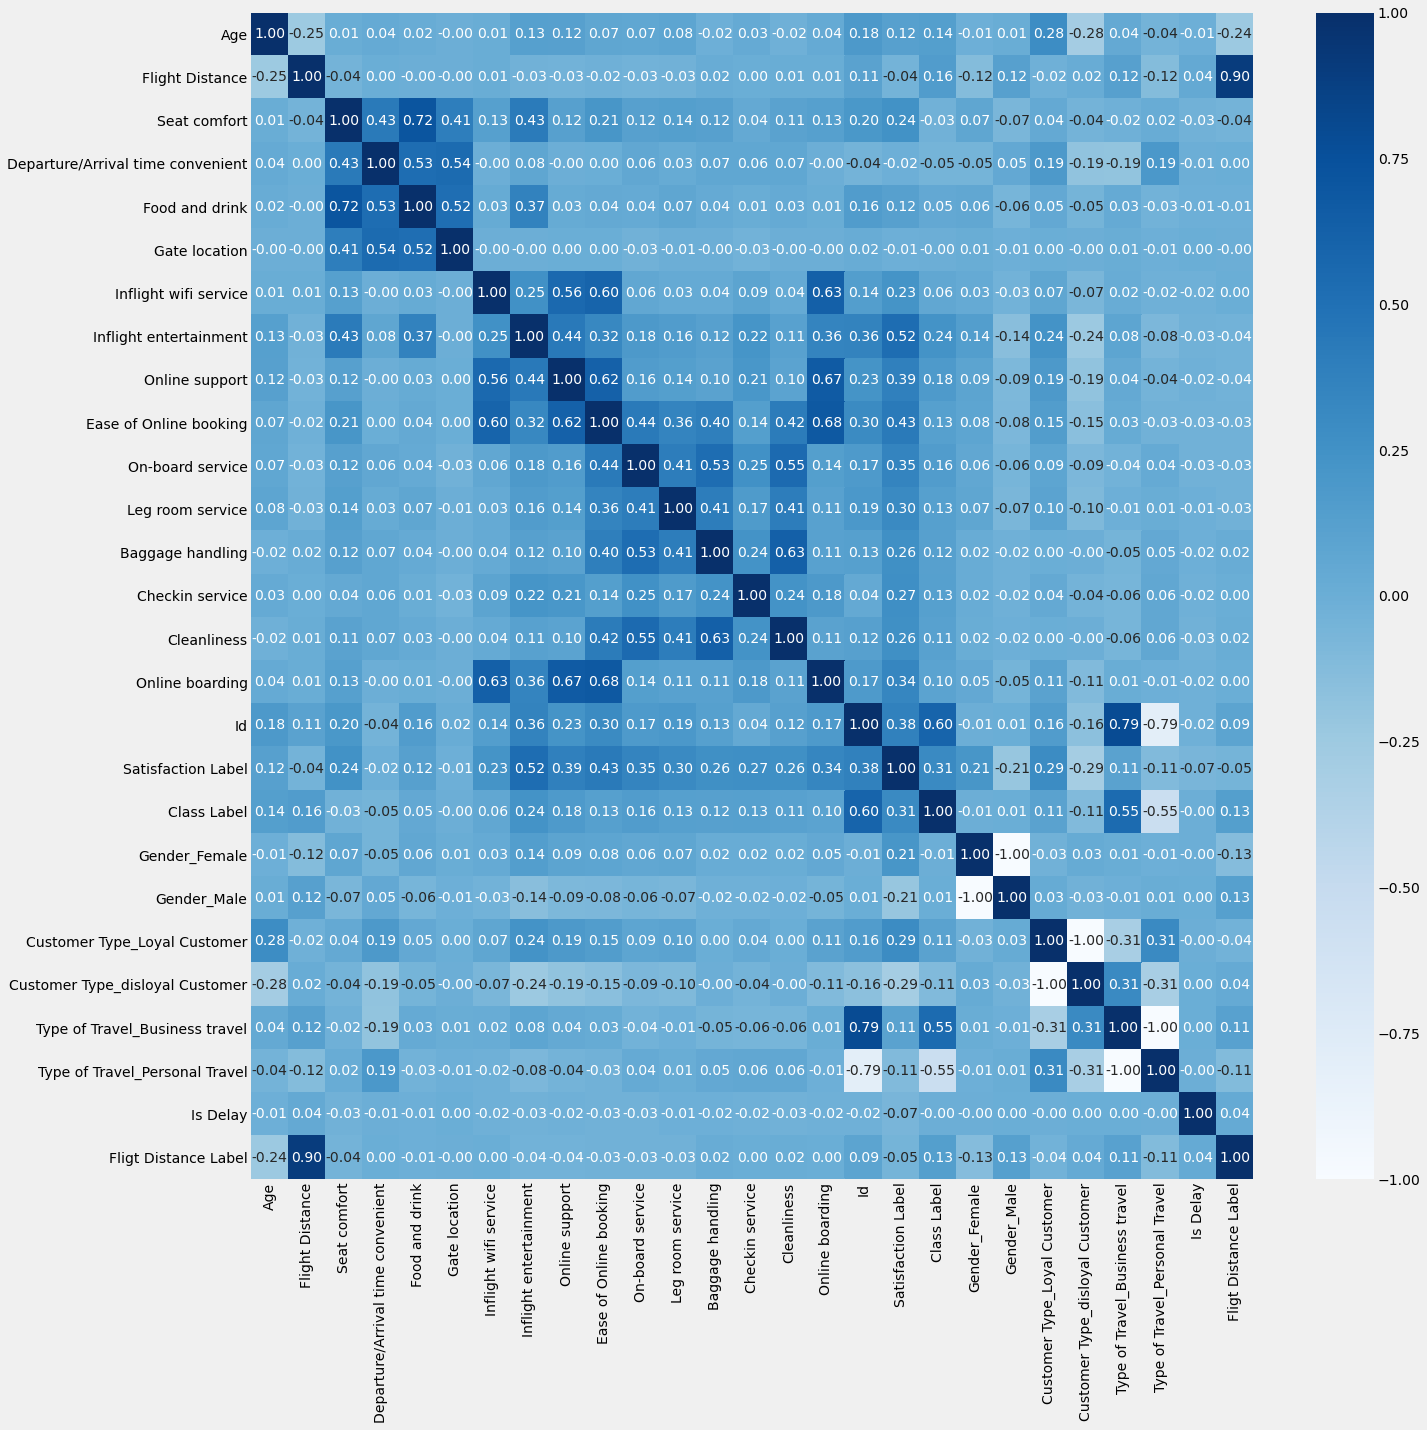

In [55]:
correlation = df1.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(correlation, annot= True, fmt = '.2f', cmap = 'Blues')
plt.show()

Terlihat bahwa ternyata feature flight distance label, is delay, gate location, depature/arrival time convenient memiliki korelasi yang sangat kecil terhadap target. Oleh karena itu, feature-feature tersebut tidak akan digunakan untuk modelling.

## Spill Train & Test 

In [64]:
X = df1.drop(['Satisfaction Label', 'Fligt Distance Label', 'Is Delay', 'Gate location', 'Departure/Arrival time convenient','Flight Distance', 'age_category', 'Id'], axis = 1)
y = df1['Satisfaction Label']

In [65]:
X.head()

,Age,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Class Label,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,65,0,0,2,4,2,3,3,0,3,5,3,2,0,1,0,1,0,0,1
1,47,0,0,0,2,2,3,4,4,4,2,3,2,2,0,1,1,0,0,1
2,15,0,0,2,0,2,2,3,3,4,4,4,2,0,1,0,1,0,0,1
3,60,0,0,3,4,3,1,1,0,1,4,1,3,0,1,0,1,0,0,1
4,70,0,0,4,3,4,2,2,0,2,4,2,5,0,1,0,1,0,0,1


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [68]:
print ("X_train :", X_train.shape)
print ("X_test :", X_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

X_train : (90916, 20)
X_test : (38964, 20)
y_train : (90916,)
y_test : (38964,)


# Modelling

In [69]:
def evaluation_score(y_pred_training, y_pred_testing):
    confusion_matrix_training_df = pd.DataFrame((confusion_matrix(y_train, y_pred_training)), ('Dissatisfied', 'Satisfied'), ('Dissatisfied', 'Satisfied'))
    confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_pred_testing)), ('Dissatisfied', 'Satisfied'), ('Dissatisfied', 'Satisfied'))
    #plt.figure(figsize = (5,5))
    fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    
    heatmap_training = sns.heatmap(confusion_matrix_training_df, annot=True, annot_kws={'size': 20}, fmt='d', cmap = 'Blues', ax= axes[0])
    heatmap_training.yaxis.set_ticklabels(heatmap_training.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap_training.xaxis.set_ticklabels(heatmap_training.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    
    axes[0].set_title('Confusion Matrix for Training', fontsize=20, color='darkblue')
    axes[0].text(
       x = 0, 
       y = 3.2, 
       s = 'Evaluation Score Training:\n1. Acuracy Score   : {:.2f}\n\n2. Precision Score   : {:.2f}\n\n3. Recall Score   : {:.2f}\n\n4. F1-Score   : {:.2f}'.format(accuracy_score(y_train, y_pred_training), precision_score(y_train, y_pred_training),recall_score(y_train, y_pred_training),f1_score(y_train, y_pred_training))
    )
    axes[0].set_ylabel('True Label', fontsize=20)
    axes[0].set_xlabel('Predicted Label', fontsize=20)
    
    heatmap_testing = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 20}, fmt='d', cmap = 'Blues', ax= axes[1])
    heatmap_testing.yaxis.set_ticklabels(heatmap_testing.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap_testing.xaxis.set_ticklabels(heatmap_testing.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    
    axes[1].set_title('Confusion Matrix for Testing', fontsize=20, color='darkblue')
    axes[1].text(
       x = 0, 
       y = 3.2, 
       s = 'Evaluation Score Testing:\n1. Acuracy Score   : {:.2f}\n\n2. Precision Score   : {:.2f}\n\n3. Recall Score   : {:.2f}\n\n4. F1-Score   : {:.2f}'.format(accuracy_score(y_test, y_pred_testing), precision_score(y_test, y_pred_testing),recall_score(y_test, y_pred_testing),f1_score(y_test, y_pred_testing))
    )
    axes[1].set_ylabel('True Label', fontsize=20)
    axes[1].set_xlabel('Predicted Label', fontsize=20)
    plt.tight_layout()
    plt.show()

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])
        
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.title('Feature Importance Score', loc = 'left', fontsize = 24, color = 'grey', weight = 'bold', va = 'center')
    plt.xlabel('Score', fontsize = 20)
    plt.ylabel('Feature', fontsize = 20)
    
    for index in range (0, len(feat_importances)):
        plt.text(x = feat_importances.nlargest(25)[index] + 0.001, y = index, s = '{:.2f}'.format(feat_importances.nlargest(25)[index]), va = 'center')

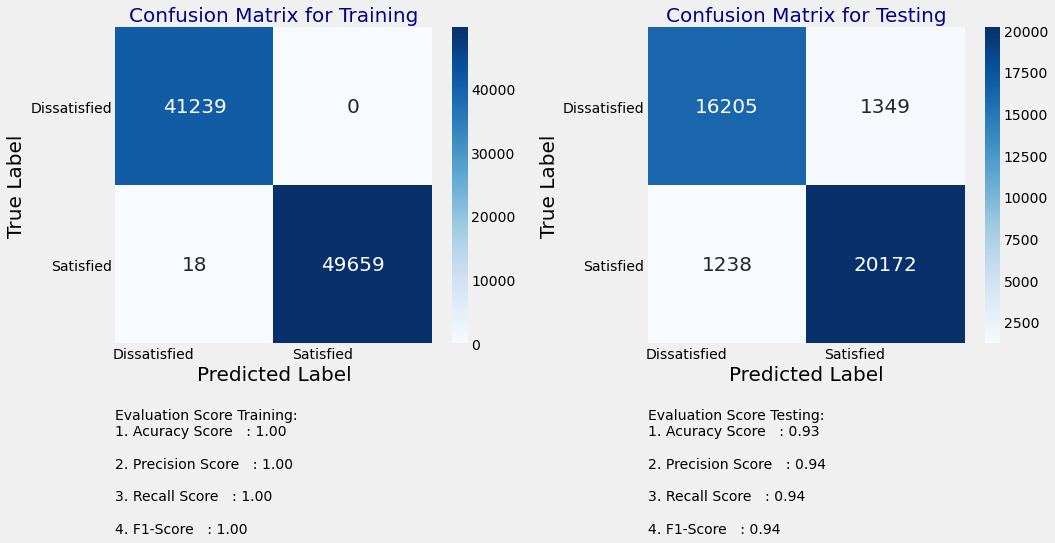

In [70]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)

y_pred_training = Decision_Tree.predict(X_train)
y_pred_testing = Decision_Tree.predict(X_test)

evaluation_score(y_pred_training, y_pred_testing)

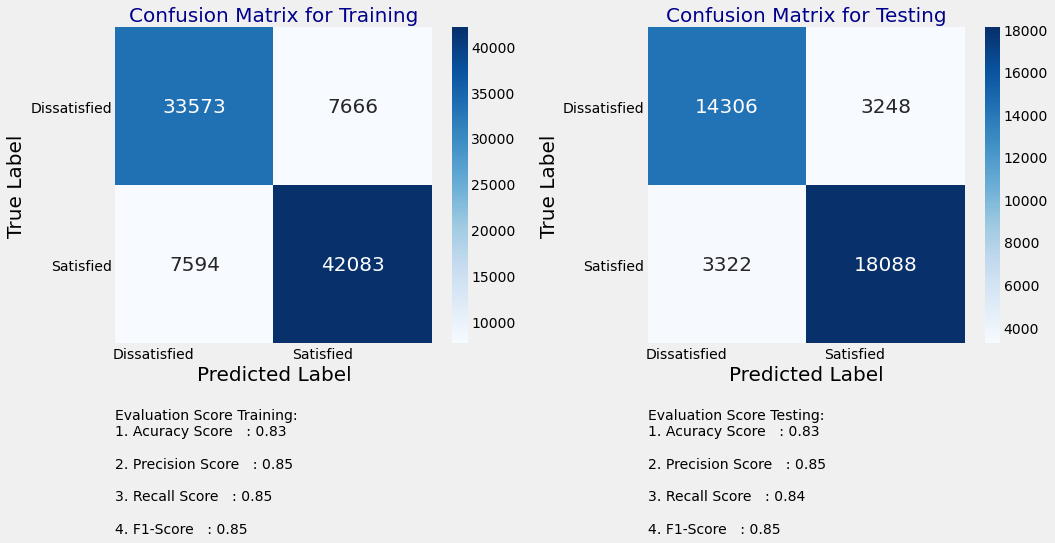

In [71]:
Logistic_Regression = LogisticRegression(random_state=42)
Logistic_Regression.fit(X_train, y_train)

y_pred_train = Logistic_Regression.predict(X_train)
y_pred_test = Logistic_Regression.predict(X_test)

evaluation_score(y_pred_train, y_pred_test)

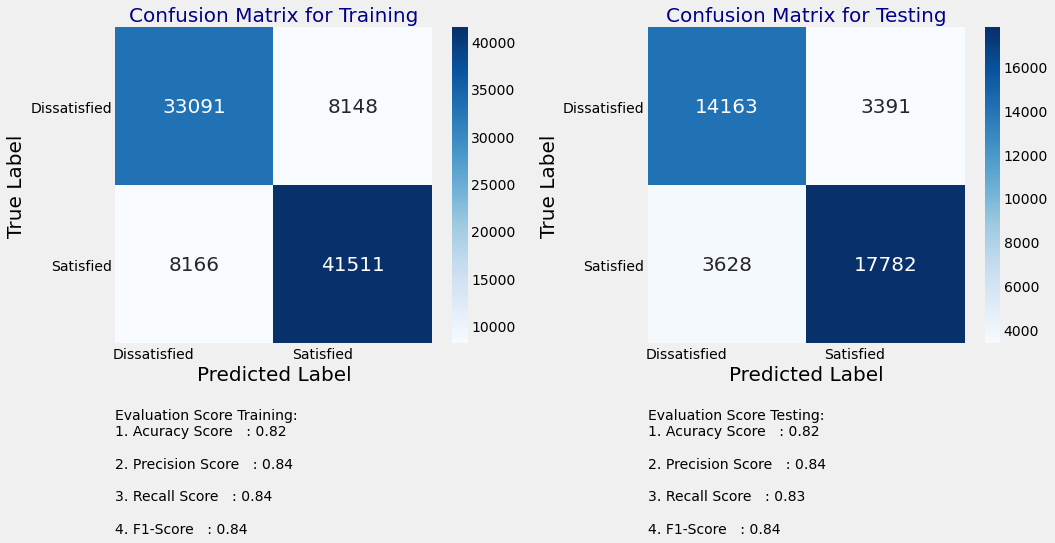

In [72]:
GaussianNB =  GaussianNB()
GaussianNB.fit(X_train, y_train)

y_pred_train = GaussianNB.predict(X_train)
y_pred_test = GaussianNB.predict(X_test)

evaluation_score(y_pred_train, y_pred_test)

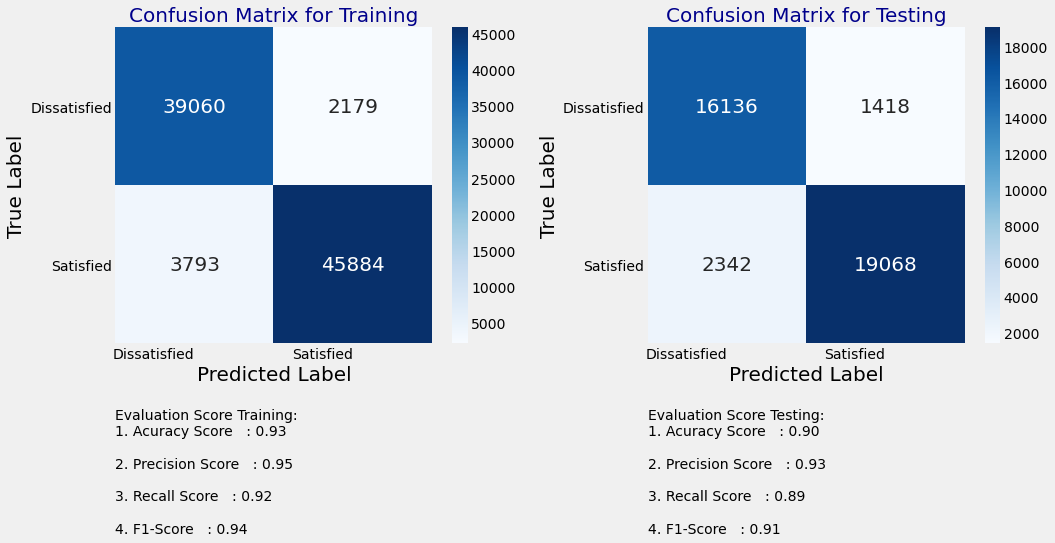

In [73]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

y_pred_train = KNN.predict(X_train)
y_pred_test = KNN.predict(X_test)

evaluation_score(y_pred_train, y_pred_test)

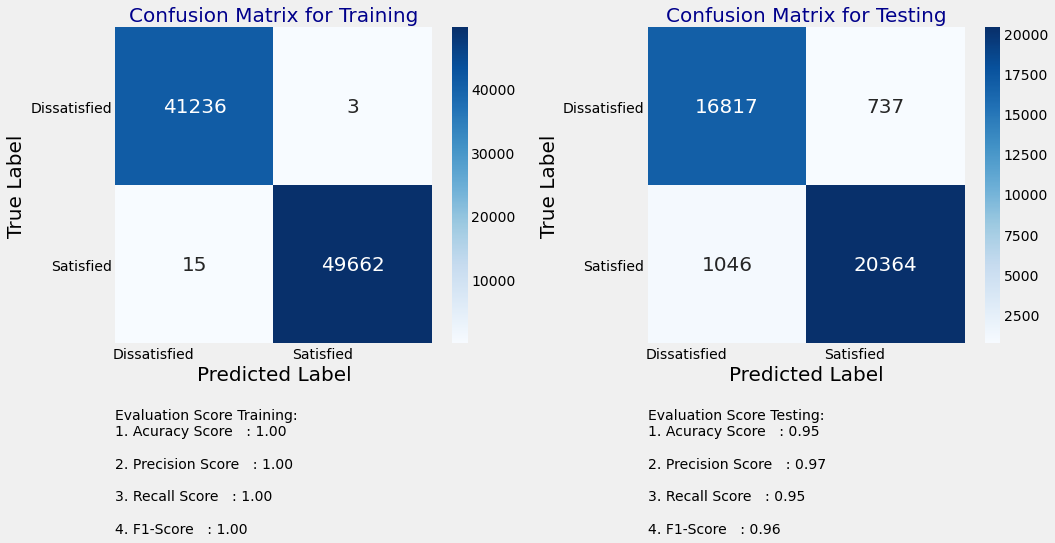

In [74]:
random_forest =  RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

evaluation_score(y_pred_train, y_pred_test)

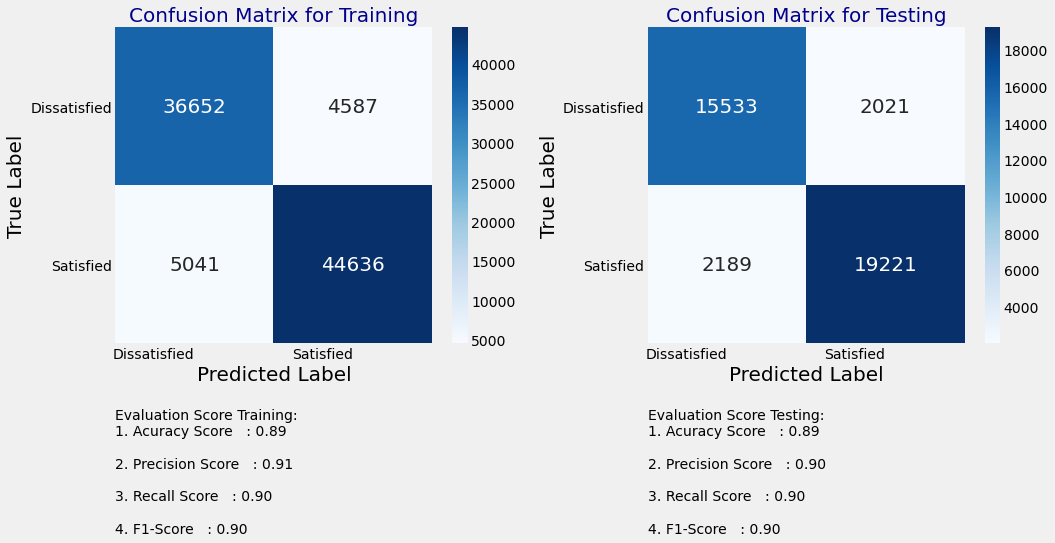

In [75]:
Adaboost = AdaBoostClassifier(random_state=42)
Adaboost.fit(X_train, y_train)

y_pred_training = Adaboost.predict(X_train)
y_pred_testing = Adaboost.predict(X_test)

evaluation_score(y_pred_training, y_pred_testing)

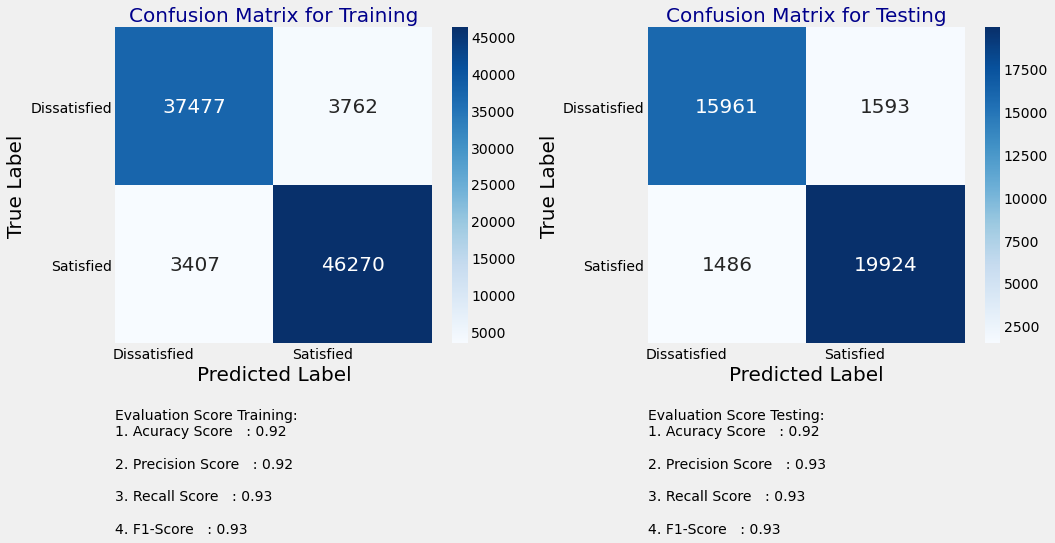

In [76]:
Gradient= GradientBoostingClassifier(random_state=42)
Gradient.fit(X_train, y_train)

y_pred_train = Gradient.predict(X_train)
y_pred_test = Gradient.predict(X_test)

evaluation_score(y_pred_train, y_pred_test)

# Evaluation

Karena target seimbang, dan kita ingin meningkatkan kualitas prediksi, yaitu dengan meminimalisir false positif yang terjadi (Actual "No", Predicted "Yes") maka kita akan menggunakan evaluation score Precision.

Berdasarkan hasil evaluation score di atas kita ketahui bahwa model Random Forest yang memiliki tingkat Precision tertinggi. Selain itu, model ini sangat baik karena tidak terjadi underfitting maupun overfitting. 

Selanjutnya karena model Random Forest memiliki evaluation score > 95% maka kami mumutuskan tidak melakukan hyperparameter tuning karena model ini sudah sangat bagus.

# Feature Importance

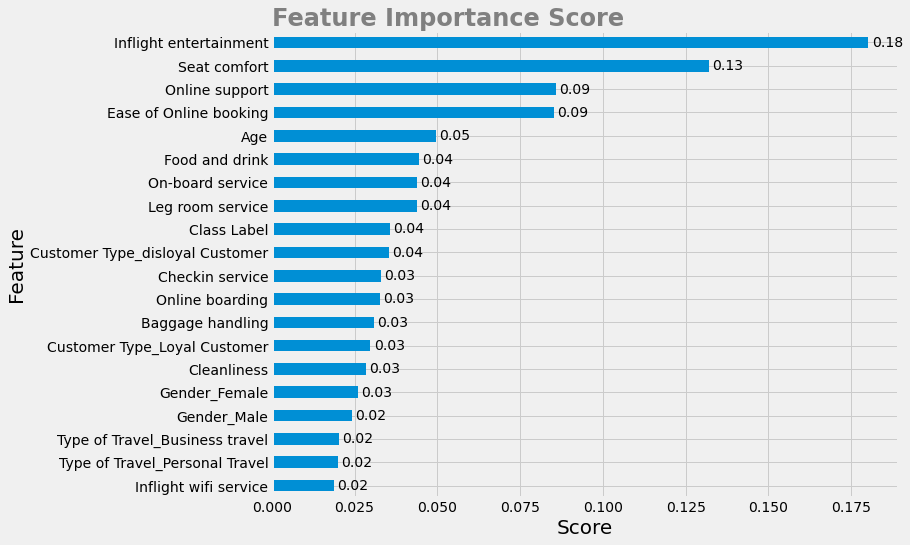

In [77]:
show_feature_importance(random_forest)